In [18]:
import numpy
import math
from matplotlib import pyplot
#display figures
%matplotlib inline

In [19]:
N = 200;
x_start, x_end = -4.0, 4.0 #set boundaries
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, x_end, N) #creates array 'x'
y = numpy.linspace(y_start, y_end, N) #creates array 'y'
X, Y = numpy.meshgrid(x,y)

In [20]:
#creating source in a uniform flow

u_inf = 1.0 #freestream speed

#compte freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype = float)

#compute free stream fxn
psi_freestream = u_inf * Y

In [21]:
def get_velocity(strength, xs, ys, X, Y):
    
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = strength / (2 * numpy.pi) * (X-xs) / ((X-xs)**2 + (Y-ys)**2)
    v = strength / (2 *numpy.pi) * (Y-ys) / ((X-xs)**2 + (Y-ys)**2)
    
    return u, v

In [22]:
def get_stream_function(strength, xs, ys, X, Y):
    
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y-ys),(X-xs))
    
    return psi

In [27]:
#defining source
strength_source = 5.0
x_source, y_source = -1.0,0.0

#compute velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)
#compute stream fxn
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

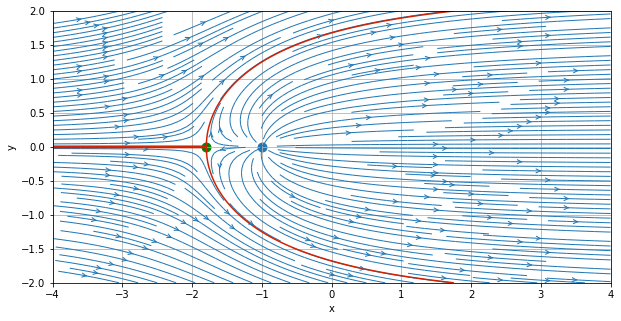

In [31]:
#superimpose the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source

psi = psi_freestream + psi_source

#plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, s=80, marker='o')

#calculate stagnation pt
x_stagnation = x_source - strength_source / (2*numpy.pi*u_inf)
y_stagnation = y_source

#display stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g',s=80,marker='o')


#display dividing streamline
pyplot.contour(X, Y, psi,
              levels=[-strength_source/2, strength_source/2],
              colors='#CD2305', linewidth=2, linestyles='solid');

## Source-Sink Pair in uniform flow

In [32]:
strength_sink = -5.0
x_sink, y_sink = 1.0,0.0

#compute velocity field 
u_sink, v_sink = get_velocity(strength_sink,x_sink,y_sink, X, Y)

#compute stream function on the mesh grid
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

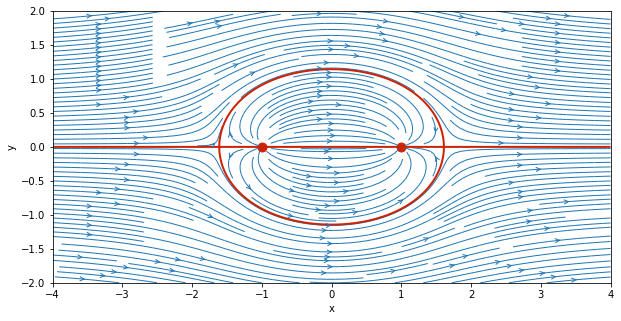

In [35]:
#superpositions of a source and sink in freestream

u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

#plot the streamlines
width=10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                 density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
              color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
              levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

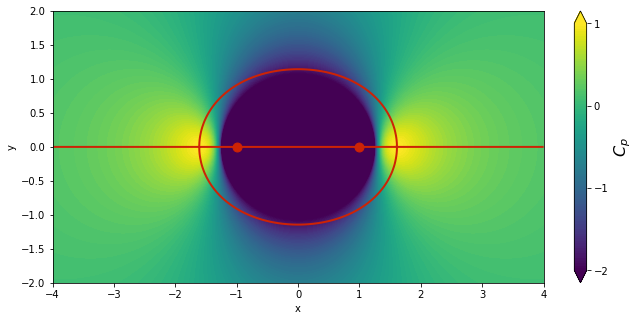

In [38]:
#compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

#plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                       levels=numpy.linspace(-2.0,1.0,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks([-2.0,-1.0,0.0,1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
              color='#CD2305', s=80, marker = 'o')
pyplot.contour(X, Y, psi,
              levels=[0.], colors='#CD2305', linewidths=2, linestlyes = 'solid');